# Aufgabe 2
## a
Lesen Sie die Trainingsdaten ein und teilen Sie sie in ein Validierungsdatenset (20%) und in ein eigentliches Trainigsdatenset (80%) auf. Finden Sie auf dem Validierungsdatensatz eine Regel für das Überleben alleine aufgrund der Klasse des Tickets (Pclass). Wenden Sie diese Regel auf die Validierungsdaten an. Wie gut ist die Genauigkeit (Anteil der korrekten Klassifikationen) auf den Validierungsdaten?

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("data/train.csv")
x = data[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
y = data["Survived"]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=42)

pclass_train_x = x_train["Pclass"].to_numpy()
pclass_train_y = y_train.to_numpy()
pclass_val_x = x_val["Pclass"].to_numpy()
pclass_val_y = y_val.to_numpy()

In [3]:
import random
def predict(x):
    random.seed(42)
    predicted = np.zeros(len(x),dtype=int)
    for i in range(len(x)):
        if x[i] == 1:
            predicted[i] = 1
        elif x[i] == 2:
            r = random.random()
            if r > 0.5:
                predicted[i] = 0
            else:
                predicted[i] = 1
        else:
            predicted[i] = 0
    return predicted

In [4]:
predicted = predict(pclass_val_x)
from sklearn.metrics import accuracy_score
accuracy_score(pclass_val_y,predicted)

0.6815642458100558

# b
Wenden Sie die Regel aus a) auf die Testdaten an und laden Sie Ihre Lösung hoch.

In [5]:
test_data = pd.read_csv("data/test.csv")
text_x = test_data["Pclass"].to_numpy()
predicted = predict(text_x)

# c
Trainieren Sie eine logistische Regression mit den Variablen 'Pclass'. Verwenden Sie die Klasse sklearn.linear_model.LogisticRegression. Berechnen Sie die Accuracy auf dem Validierungsset.


In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
res = model.fit(pclass_train_x.reshape(len(pclass_train_x),1),y_train)
p = model.predict(pclass_val_x.reshape(len(pclass_val_x),1))
accuracy_score(p,pclass_val_y)

/home/onder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7039106145251397

# d
Verwenden Sie nun weitere Features. Die Variable Age enthält Missing values, die Sie durch folgenden code ersetzen können (was passiert da?)


In [7]:
final_train_x = x_train[["Pclass","Sex","Age"]]
final_train_y = y_train
final_train_x["Age"].fillna(final_train_x["Age"].median(skipna=True),inplace=True)

final_val_x = x_val[["Pclass","Sex","Age"]]
final_val_x["Age"].fillna(final_val_x["Age"].median(skipna=True),inplace=True)
final_train_x = pd.concat([final_train_x.drop('Sex', axis=1), pd.get_dummies(final_train_x['Sex'])], axis=1)
final_train_x = pd.concat([final_train_x.drop('Pclass', axis=1), pd.get_dummies(final_train_x['Pclass'])], axis=1)
final_val_x = pd.concat([final_val_x.drop('Sex', axis=1), pd.get_dummies(final_val_x['Sex'])], axis=1)
final_val_x = pd.concat([final_val_x.drop('Pclass', axis=1), pd.get_dummies(final_val_x['Pclass'])], axis=1)

/home/onder/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
final_train_x = final_train_x.to_numpy()
final_val_x = final_val_x.to_numpy()

model = LogisticRegression()
res = model.fit(final_train_x,y_train)
p = model.predict(final_val_x)
accuracy_score(p,pclass_val_y)

/home/onder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8044692737430168

# e
Weitere Klassifikatoren. Neben der logistischen Regression, gibt es weitere Klassifikatoren. Der Random-Forest ist ein recht stabiler Klassifikator, was wäre die Performance von diesem Klassifikator.

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
res = model.fit(final_train_x,y_train)
p = model.predict(final_val_x)
accuracy_score(p,pclass_val_y)

0.7150837988826816

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
res = model.fit(final_train_x,y_train)
p = model.predict(final_val_x)
accuracy_score(p,pclass_val_y)

0.6983240223463687

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
res = model.fit(final_train_x,y_train)
p = model.predict(final_val_x)
accuracy_score(p,pclass_val_y)

0.7374301675977654

## Aufgabe 3
Mit den gleichen Daten, wie in der Aufgabe 2 d. Erstellen Sie ein fully connected neural network und fitten es an die Ttrainingsdaten. Verwenden Sie mindestens einen hidden Layer. Plotten Sie den Verlauf der Loss Kurve für die Trainings- und Validierungsdaten. Optional: Laden Sie Ihre beste Lösung auf Kaggle hoch.

In [12]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(20,))
res = model.fit(final_train_x,y_train)
p = model.predict(final_val_x)
accuracy_score(p,y_val)

/home/onder/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7932960893854749

In [13]:
import matplotlib.pyplot as plt

plt.plot(model.loss_curve_)
plt.show()

<Figure size 640x480 with 1 Axes>

Using TensorFlow backend.
Train on 712 samples, validate on 179 samples
Epoch 1/20
 - 4s - loss: 2.9347 - accuracy: 0.3792 - val_loss: 2.4259 - val_accuracy: 0.4134
Epoch 2/20
 - 0s - loss: 2.0540 - accuracy: 0.3722 - val_loss: 1.5798 - val_accuracy: 0.4134
Epoch 3/20
 - 0s - loss: 1.2643 - accuracy: 0.3666 - val_loss: 0.9101 - val_accuracy: 0.4134
Epoch 4/20
 - 0s - loss: 0.7593 - accuracy: 0.4480 - val_loss: 0.6263 - val_accuracy: 0.7654
Epoch 5/20
 - 0s - loss: 0.5940 - accuracy: 0.7191 - val_loss: 0.6151 - val_accuracy: 0.5922
Epoch 6/20
 - 0s - loss: 0.6010 - accuracy: 0.6348 - val_loss: 0.6202 - val_accuracy: 0.5922
Epoch 7/20
 - 0s - loss: 0.5943 - accuracy: 0.6348 - val_loss: 0.6061 - val_accuracy: 0.5978
Epoch 8/20
 - 0s - loss: 0.5839 - accuracy: 0.6390 - val_loss: 0.5951 - val_accuracy: 0.6313
Epoch 9/20
 - 0s - loss: 0.5797 - accuracy: 0.7374 - val_loss: 0.5905 - val_accuracy: 0.7542
Epoch 10/20
 - 0s - loss: 0.5768 - accuracy: 0.7753 - val_loss: 0.5867 - val_accuracy: 0.74

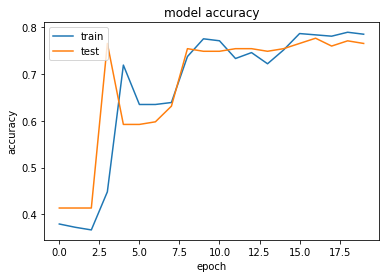

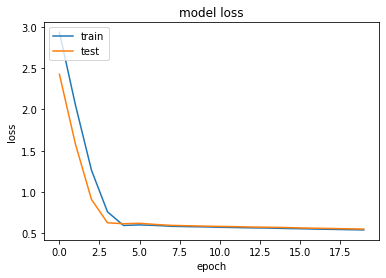

In [14]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20,input_dim=6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(final_train_x,final_train_y,batch_size=64,epochs=20,verbose=2,validation_data=(final_val_x,pclass_val_y))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()